In [1]:
import matplotlib.pyplot as plt
import torch
from task_dataset import TaskDataset, load_dataset

In [2]:
dataset = load_dataset("Train.pt")

In [3]:
print(f"Images shape: {dataset.imgs[0].size}")
print(f"Number of unique labels: {len(set(dataset.labels))}")

Images shape: (32, 32)
Number of unique labels: 10


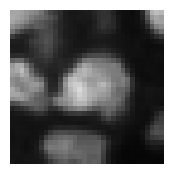

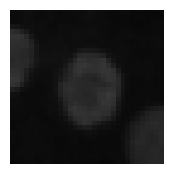

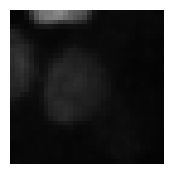

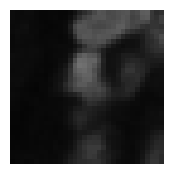

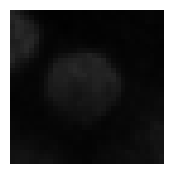

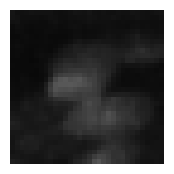

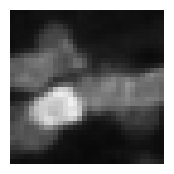

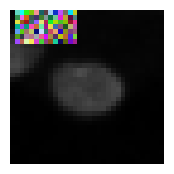

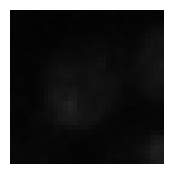

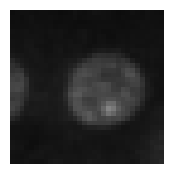

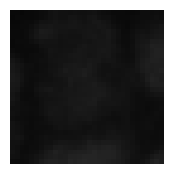

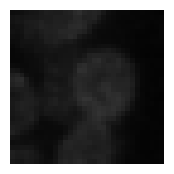

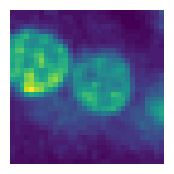

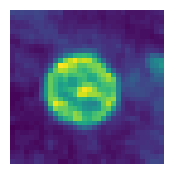

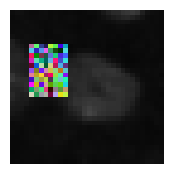

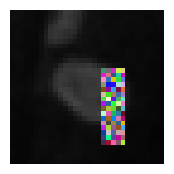

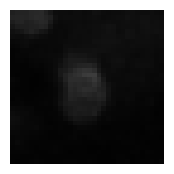

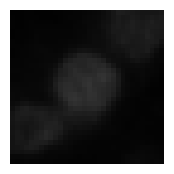

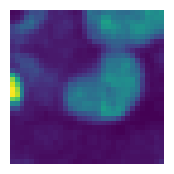

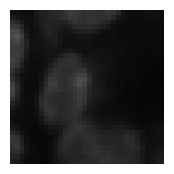

In [4]:
rand_idx = torch.randint(0, len(dataset), (20,))

for idx in rand_idx.tolist():
    obraz = dataset.imgs[idx]
    plt.figure(figsize=(2, 2))
    plt.imshow(obraz)
    plt.axis('off')
    plt.show()

In [5]:
from collections import Counter
counter = Counter(dataset.labels)
print(counter)
# unbalanced - so is life

Counter({8: 31802, 2: 23356, 5: 14886, 1: 9171, 4: 7036, 9: 4706, 6: 4642, 3: 3568, 0: 424, 7: 409})


In [12]:
from adversary import fgsm_attack, pgd_attack
from resnet import Resnet18

resnet = Resnet18()
state_dict = torch.load("resnet18_epoch_4.pt", map_location=torch.device('cpu'))
resnet.model.load_state_dict(state_dict)

/var/folders/h6/ytvgvnbs57n5zl4bsrvxpzww0000gn/T/ipykernel_76942/1825791616.py:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load("resnet18_epoch_4.pt"

<All keys matched successfully>

In [13]:
fgsm_attack(resnet, dataset.imgs[0], dataset.labels[0],)

TypeError: conv2d() received an invalid combination of arguments - got (Image, Parameter, NoneType, tuple, tuple, tuple, int), but expected one of:
 * (Tensor input, Tensor weight, Tensor bias = None, tuple of ints stride = 1, tuple of ints padding = 0, tuple of ints dilation = 1, int groups = 1)
      didn't match because some of the arguments have invalid types: (!Image!, !Parameter!, !NoneType!, !tuple of (int, int)!, !tuple of (int, int)!, !tuple of (int, int)!, !int!)
 * (Tensor input, Tensor weight, Tensor bias = None, tuple of ints stride = 1, str padding = "valid", tuple of ints dilation = 1, int groups = 1)
      didn't match because some of the arguments have invalid types: (!Image!, !Parameter!, !NoneType!, !tuple of (int, int)!, !tuple of (int, int)!, !tuple of (int, int)!, !int!)
